<a href="https://colab.research.google.com/github/noeljohn717/Noel-John/blob/main/quantum_phase_estimation_assignment_noel_john.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install qiskit==0.43.2

In [2]:
import qiskit
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute, Aer
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import QFT

In [13]:
# Number of counting qubits
num_counting_qubits = 3

# Create registers
counting_qubits = QuantumRegister(num_counting_qubits, name='counting')
target_qubit = QuantumRegister(1, name='target')
classical_register = ClassicalRegister(num_counting_qubits, name='classical')

# Create the circuit
circuit = QuantumCircuit(counting_qubits, target_qubit, classical_register)

# Initialize the target qubit to |1⟩
circuit.x(target_qubit[0])

# Apply Hadamard gates to counting qubits
circuit.h(counting_qubits)

# Apply controlled-S operations
repetitions = 1
for counting_qubit_index in range(num_counting_qubits):
    for _ in range(repetitions):
        circuit.cp(0.5 * 2 * 3.14159, counting_qubits[counting_qubit_index], target_qubit[0])  # Controlled-S (phase = pi/2 or 0.5 * 2pi)
    repetitions *= 2

# Apply inverse QFT
circuit.append(QFT(num_counting_qubits, inverse=True), counting_qubits)

# Measure the counting qubits
circuit.measure(counting_qubits, classical_register)

# Draw the circuit
circuit.draw(fold=-1)

┌───┐                                                                                    ┌───────┐┌─┐      
 counting_0: ┤ H ├─■──────────────────────────────────────────────────────────────────────────────────┤0      ├┤M├──────
             ├───┤ │                                                                                  │       │└╥┘┌─┐   
 counting_1: ┤ H ├─┼───────────■───────────■──────────────────────────────────────────────────────────┤1 IQFT ├─╫─┤M├───
             ├───┤ │           │           │                                                          │       │ ║ └╥┘┌─┐
 counting_2: ┤ H ├─┼───────────┼───────────┼───────────■───────────■───────────■───────────■──────────┤2      ├─╫──╫─┤M├
             ├───┤ │P(3.1416)  │P(3.1416)  │P(3.1416)  │P(3.1416)  │P(3.1416)  │P(3.1416)  │P(3.1416) └───────┘ ║  ║ └╥┘
     target: ┤ X ├─■───────────■───────────■───────────■───────────■───────────■───────────■────────────────────╫──╫──╫─
             └───┘                                                                                              ║  ║  ║ 
classical: 3/═══════════════════════════════════════════════════════════════════════════════════════════════════╩══╩══╩═
                                                                                                                0  1  2

In [11]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots=1024)
result = job.result()
counts = result.get_counts()

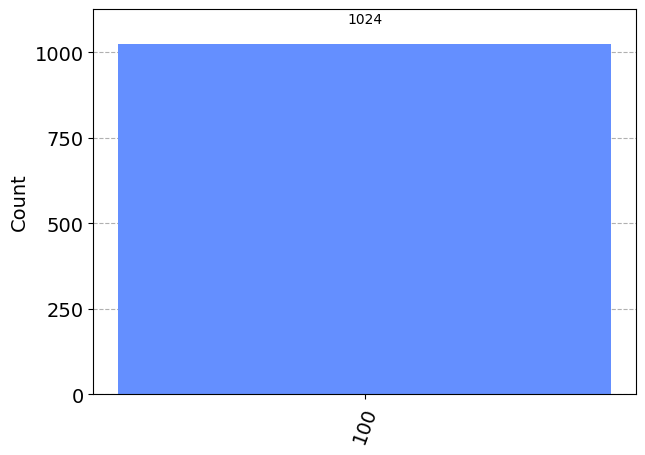

In [12]:
plot_histogram(counts)